# AI-Powered Customer Issue Intelligence System
## Data Understanding

**Objective:**  
Analyze real consumer complaint text to build an NLP system that classifies issues, identifies emerging complaint themes, and generates actionable business insights.


In [1]:
#STEP 1: Load and underderstand the text data(NLP STYLE)
import pandas as pd

df = pd.read_csv("rows.csv")
df.head()


/tmp/ipython-input-2780824763.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("rows.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275.0
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228.0
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964.0
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479.0
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460.0


In [2]:
df.shape


(540359, 18)

In [3]:
df.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
#Step 2: Filter to valid text
# Keep only rows with actual complaint text
df_text = df[df["Consumer complaint narrative"].notna()].copy()

df_text.shape


(231007, 18)

In [5]:
#Sanity check
df_text["Consumer complaint narrative"].iloc[0]


"The Summer of XX/XX/2018 I was denied a mortgage loan due to a charge off from XXXX XXXX credit card. I both mailed an account validation letter and disputed this debt with the credit bureaus and the credit card company several times. Only the credit bureaus responded that this debt was verified but showed no proof as I requested. XXXX XXXX still has not responded to any of my letters since XX/XX/2018. All I asked was that the credit bureaus show me how they verified this debt and what XXXX XXXX sent them as proof of my debt other than a bill that could be fabricated. I really need to know why I haven't been shown proof of this after multiple disputes and certified letters letters sent."

In [6]:
#Text length analysis
df_text["text_length"] = df_text["Consumer complaint narrative"].apply(len)
df_text["text_length"].describe()


,text_length
count,231007.000000
mean,1107.809214
std,1316.233219
min,5.000000
25%,394.000000
50%,748.000000
75%,1347.000000
max,31735.000000


<Axes: >

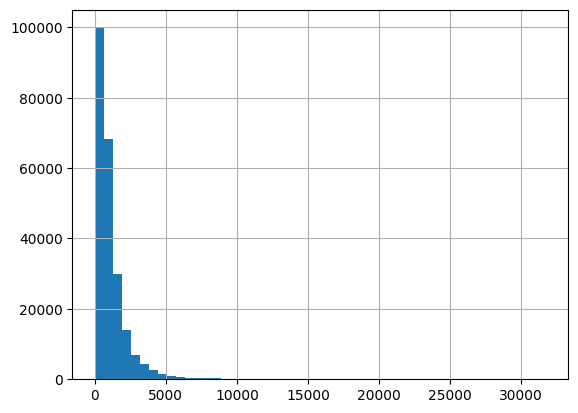

In [7]:
df_text["text_length"].hist(bins=50)


### Text Characteristics

Consumer complaints consist of long-form, unstructured narratives written in natural language.  
Text length varies significantly, reflecting different customer communication styles and issue complexity.

This variability motivates the use of both traditional NLP techniques and transformer-based models.


In [8]:
#Step 3:Label Analysis
#Inspect issue distribution
df_text["Issue"].value_counts().head(15)


,count
Issue,
Incorrect information on your report,48773
Problem with a credit reporting company's investigation into an existing problem,24727
Attempts to collect debt not owed,19845
Improper use of your report,15334
Trouble during payment process,9151
Written notification about debt,8976
Dealing with your lender or servicer,7018
Managing an account,6947
Struggling to pay mortgage,6473


In [9]:
#How many unique issues
df_text["Issue"].nunique()


156

In [10]:
df_text.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'text_length'],
      dtype='object')

In [11]:
df_text["Product"].nunique()


18

In [12]:
df_text["Product"].value_counts().head(15)


,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",92378
Debt collection,49231
Mortgage,21796
Credit card or prepaid card,21379
Checking or savings account,12881
Student loan,11918
Vehicle loan or lease,5745
"Money transfer, virtual currency, or money service",5466
"Payday loan, title loan, or personal loan",4421


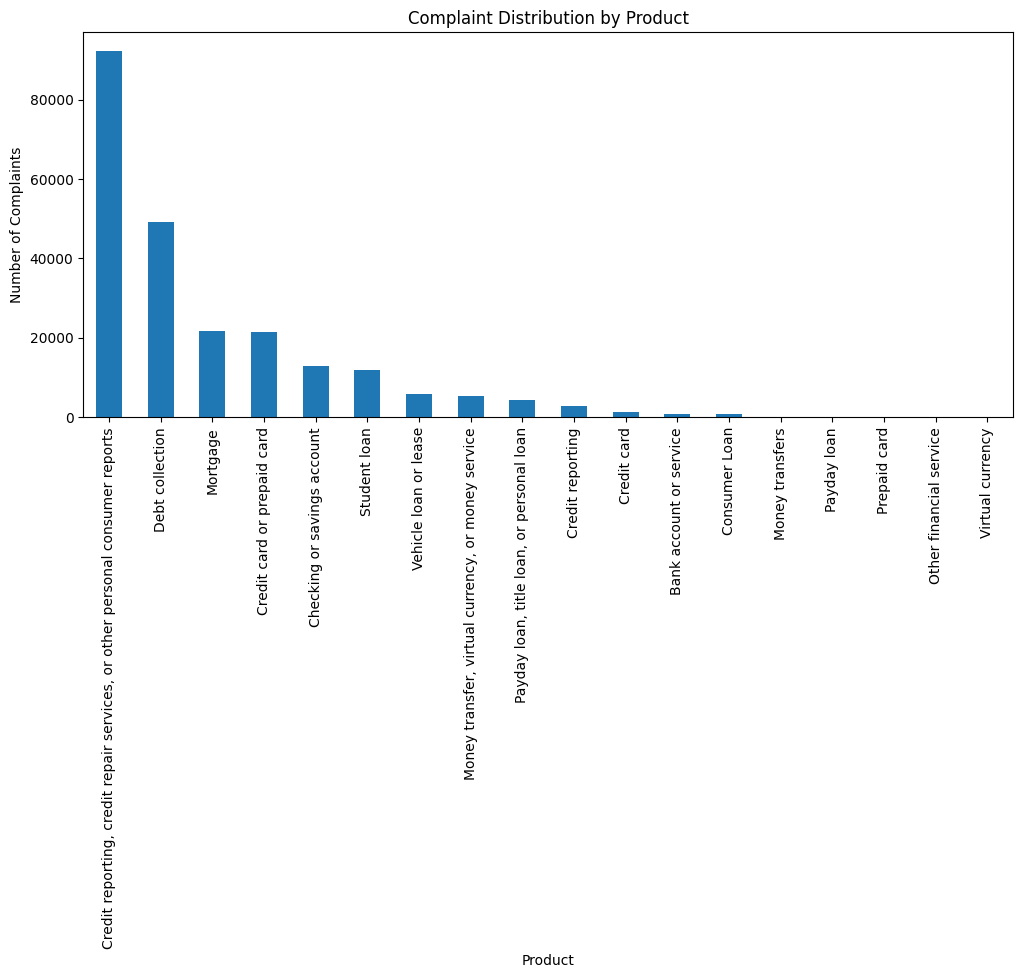

In [13]:
#VISUALISE PRODUCT IMBALANACE
import matplotlib.pyplot as plt

df_text["Product"].value_counts().plot(kind="bar", figsize=(12,5))
plt.title("Complaint Distribution by Product")
plt.ylabel("Number of Complaints")
plt.show()


### Target Variable Selection

Although the dataset contains highly granular issue labels, complaint classification is reframed at the product level to reflect real-world complaint triage practices.

Product-level classification enables robust multi-class modeling while allowing fine-grained issue discovery through downstream topic modeling.


In [14]:
#Step 4: Baseline NLP Model
from sklearn.model_selection import train_test_split

X = df_text["Consumer complaint narrative"]
y = df_text["Product"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [15]:
# Keep only products with sufficient samples
product_counts = df_text["Product"].value_counts()
valid_products = product_counts[product_counts >= 100].index

df_model = df_text[df_text["Product"].isin(valid_products)].copy()

df_model["Product"].value_counts().describe()


,count
count,13.000000
mean,17749.384615
std,26131.786419
min,728.000000
25%,2702.000000
50%,5745.000000
75%,21379.000000
max,92378.000000


In [16]:
X = df_model["Consumer complaint narrative"]
y = df_model["Product"]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Handling Rare Classes

Some product categories contained very few samples, which can lead to unstable model training and evaluation.

To ensure robust and meaningful classification, products with fewer than 100 complaints were excluded from the modeling dataset.


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1, 2),
        stop_words="english"
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1
    ))
])

pipeline


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=20000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

In [19]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=20000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

In [20]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.13      0.29      0.18       181
                                                 Checking or savings account       0.75      0.78      0.76      2576
                                                               Consumer Loan       0.08      0.14      0.10       146
                                                                 Credit card       0.12      0.32      0.17       239
                                                 Credit card or prepaid card       0.72      0.75      0.73      4276
                                                            Credit reporting       0.13      0.62      0.22       540
Credit reporting, credit repair services, or other personal consumer reports       0.92      0.68      0.78     18476
                                                       

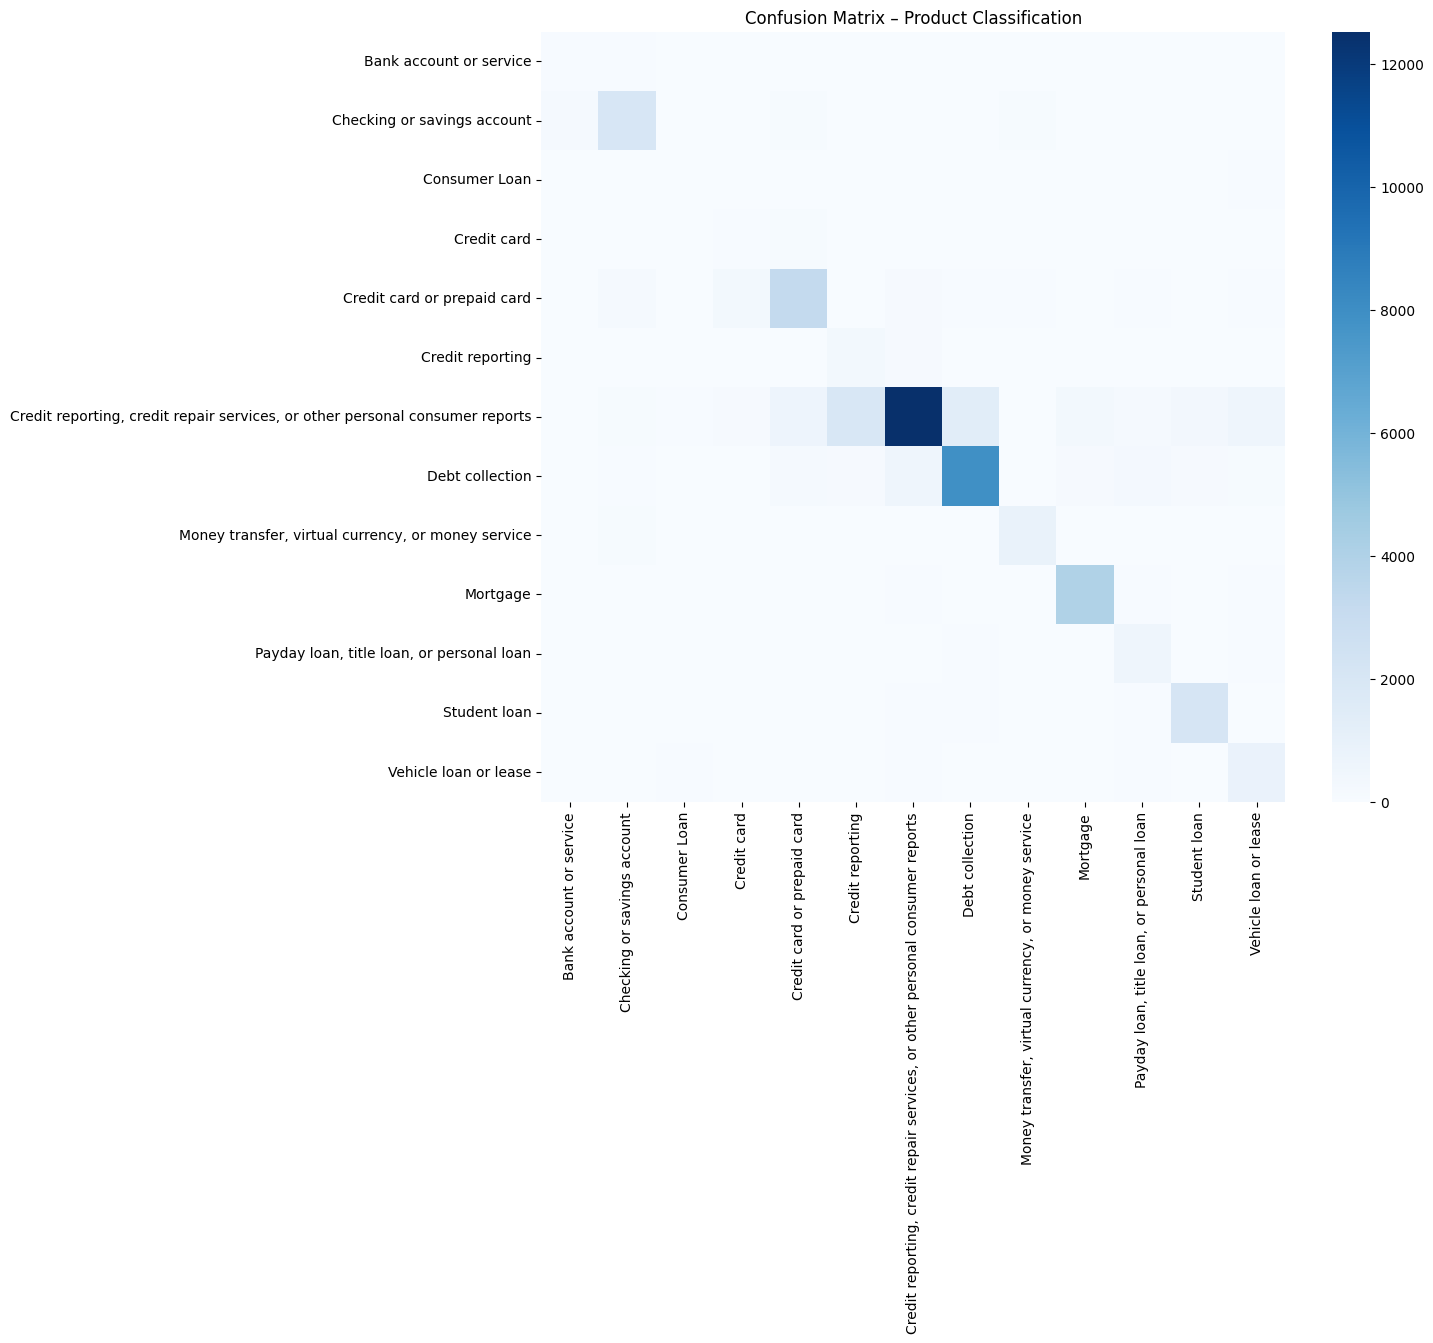

In [21]:
#Step 5: Error Analysis
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title("Confusion Matrix – Product Classification")
plt.show()


In [22]:
errors = pd.DataFrame({
    "text": X_test,
    "true_product": y_test,
    "predicted_product": y_pred
})

errors[errors["true_product"] != errors["predicted_product"]].head(10)


,text,true_product,predicted_product
193237,Synchrony / Walmart Credit card stated that th...,"Credit reporting, credit repair services, or o...",Credit card or prepaid card
149525,I did not subscribe to XXXX. My demand require...,Debt collection,"Credit reporting, credit repair services, or o..."
299397,On XXXX and XX/XX/2016 my credit report is sho...,"Credit reporting, credit repair services, or o...",Credit reporting
203216,I had previously filed a dispute with all thre...,"Credit reporting, credit repair services, or o...",Credit reporting
140498,I have contacted Transunion multiple times to ...,"Credit reporting, credit repair services, or o...",Credit reporting
496321,My credit was pulled and sent to a lot of diff...,"Credit reporting, credit repair services, or o...",Vehicle loan or lease
464086,citi bank is reporting erroneous inaccurate an...,"Credit reporting, credit repair services, or o...",Credit card
184529,I Am having A Problem With XXXX Credit Report ...,"Credit reporting, credit repair services, or o...",Checking or savings account
305747,I called both companies to let them know I was...,"Credit reporting, credit repair services, or o...",Credit card or prepaid card
362268,I contacted XXXX to find out more details abou...,"Credit reporting, credit repair services, or o...",Consumer Loan


### Error Analysis

Misclassifications frequently occur between closely related financial products such as credit cards, bank accounts, and consumer loans.

Many complaints reference multiple products or services within a single narrative, highlighting the inherent ambiguity of real-world customer text.

These observations suggest opportunities for hierarchical classification and multi-label modeling.


### Confusion Analysis

The confusion matrix reveals strong performance for products with distinct terminology such as mortgages, student loans, and debt collection.

Misclassifications primarily occur between closely related financial products, particularly among credit cards, bank accounts, and credit reporting services. Manual inspection of misclassified examples shows that many complaints reference multiple products within a single narrative.

This highlights the inherent ambiguity of real-world customer text and suggests that multi-label or hierarchical classification may better reflect how complaints are expressed by consumers.


In [23]:
#Tranformer model (BERT)
!pip install -q sentence-transformers


In [24]:
from sentence_transformers import SentenceTransformer
import numpy as np


In [25]:
#Load BERT model
bert_model = SentenceTransformer("all-MiniLM-L6-v2")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
X_train_emb = bert_model.encode(X_train.tolist(), show_progress_bar=True)
X_test_emb = bert_model.encode(X_test.tolist(), show_progress_bar=True)


Batches:   0%|          | 0/5769 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Transformer Embedding Strategy

Sentence-BERT was used to generate dense semantic representations of complaint narratives.  
Batch-based encoding enabled efficient processing of long-form text at scale while preserving contextual meaning.


In [27]:
# Create a smaller, representative subset for BERT
X_train_small = X_train.sample(15000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

X_test_small = X_test.sample(5000, random_state=42)
y_test_small = y_test.loc[X_test_small.index]

X_train_small.shape, X_test_small.shape


((15000,), (5000,))

In [28]:
X_train_emb = bert_model.encode(
    X_train_small.tolist(),
    batch_size=32,
    show_progress_bar=True
)

X_test_emb = bert_model.encode(
    X_test_small.tolist(),
    batch_size=32,
    show_progress_bar=True
)


Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

bert_clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

bert_clf.fit(X_train_emb, y_train_small)

y_pred_bert = bert_clf.predict(X_test_emb)

print(classification_report(y_test_small, y_pred_bert))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.03      0.14      0.05        22
                                                 Checking or savings account       0.63      0.59      0.61       281
                                                               Consumer Loan       0.02      0.13      0.04        15
                                                                 Credit card       0.05      0.36      0.09        25
                                                 Credit card or prepaid card       0.68      0.57      0.62       467
                                                            Credit reporting       0.05      0.54      0.09        48
Credit reporting, credit repair services, or other personal consumer reports       0.88      0.49      0.63      1962
                                                       

### Performance Optimization

Due to the computational cost of transformer-based embeddings, a representative subset of the dataset was used for BERT-based modeling to enable efficient experimentation while preserving class diversity.


### TF-IDF vs Transformer Comparison

The TF-IDF baseline achieved stronger overall macro F1 performance, reflecting its robustness on frequent and well-defined product categories.

The transformer-based model demonstrated improved semantic understanding for complex financial products such as mortgages, student loans, and debt collection. However, performance on extremely low-support and ambiguous categories remained challenging, highlighting the impact of label noise and sample size in real-world complaint data.

This comparison illustrates the tradeoff between classical NLP robustness and transformer-based contextual modeling.
